Training image pixel intensities:


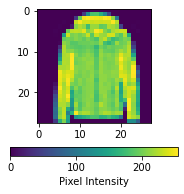

Training images(25):


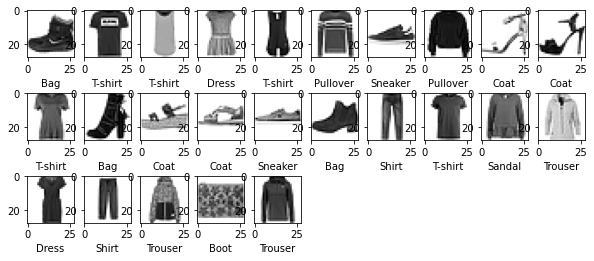

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
import matplotlib.pyplot as plt

dataset = tf.keras.datasets.fashion_mnist
(tr_img, tr_lbl), (test_img, test_lbl) = dataset.load_data()

labels = ['T-shirt', 'Shirt', 'Pullover', 'Dress', 'Trouser', 'Coat', 'Sandal', 'Sneaker', 'Boot', 'Bag']
#print(tr_img.shape)
#print(te_img.shape)

print('Training image pixel intensities:')
plt.figure(figsize=(3, 3))
plt.imshow(tr_img[5000])
plt.colorbar(label="Pixel Intensity", orientation="horizontal")
plt.show()

#normalisation
tr_img = tr_img.astype('float32')
test_img = test_img.astype('float32')
tr_img = tr_img / (255.0)
test_img = test_img / (255.0)

print('Training images(25):')
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(10, 10, i+1)
    plt.grid(False)
    plt.imshow(tr_img[i], cmap=plt.cm.binary)
    plt.xlabel(labels[tr_lbl[i]])
plt.show()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.0892
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0041 - accuracy: 0.0642
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0023 - accuracy: 0.0736
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.0794
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.0817
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0010 - accuracy: 0.0832
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 8.6755e-04 - accuracy: 0.0843
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 7.4886e-04 - accuracy: 0.0853
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.5857e-04 - accuracy: 0.0860
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step -

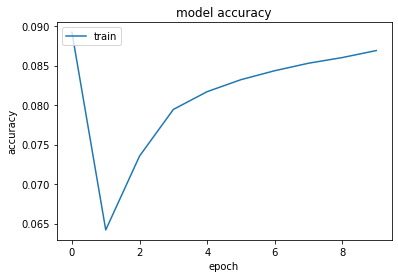

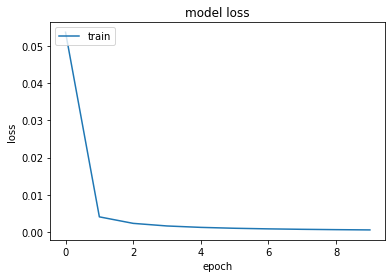

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='SGD', loss=tf.keras.losses.KLDivergence(), metrics=['accuracy'])
history = model.fit(tr_img, tr_lbl, epochs=10)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_img,  test_lbl, verbose=2)
print('\nTest accuracy:', test_accuracy)

313/313 - 0s - loss: -9.1900e-07 - accuracy: 0.1010

Test accuracy: 0.10100000351667404
